<a href="https://colab.research.google.com/github/AkashK18/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Netflix_%26_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

 **In this project, you are required to do**

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

**Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Libraries**

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np

# importing libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

**Mounting drive and Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projects/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

**Looking and understanding about all the aspects of dataset.**

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#shape and size of dataset
df.shape

(7787, 12)

In [7]:
#looking for any duplicates in dataset
len(df[df.duplicated()])

0

**Looking for null values in dataset**

In [8]:
#sum of all null values for each features
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64



*   Several features in dataset have null values.
*   So to handle those null values in better way, lets look for percentage of null values in dataset.



In [9]:
#percentage of all null values for each features
df.isnull().sum()/df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
df.drop('director', axis=1, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df.dropna(subset=['date_added'], inplace=True)
df['cast'].fillna('missing', inplace=True)

In [11]:
#final check for null value
df.isnull().sum()/df.shape[0]*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

All the null values handed and dataset is ready for next challenges.


**Looking for data types and data formats**

In [12]:
# information about all the features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   cast          7777 non-null   object
 4   country       7777 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.1+ KB


Date_added feature have object datatype.

converting to datetime datatype from object datatype.

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'])

Duration feature have object datatype . Converting to int datetype from object datatype

In [14]:
df['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7777, dtype: object



*   Duration are in combination of int values and string.
*   Removing string part so as to get int datatype.



In [15]:
#splitting each values by space and selecting int part at zeroth index
df['duration'] = df['duration'].apply(lambda x : x.split(" ")[0])


In [16]:
# check for updated duration values
df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 729.1+ KB


Now all the features and their values are in required datatyped and formats.

In [18]:
# setting limits for display of rows and columns for better understanding.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

**Creating some new features from existing features to understand data better.**

In [19]:
# add new features from date feature.
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [20]:
#check for final dataset shape
df.shape

(7777, 14)

# **EDA**

**Movies Vs. TV Shows**



*   This dataset contains data about movies and TV shows which were added on netflix.




**Lets look at dominance between Movies and TV Shows.**

([<matplotlib.patches.Wedge at 0x7f24167dbe80>,
 [Text(-0.9070648963562528, -0.6222807033792873, 'Movie'),
  Text(0.9895252779208632, 0.6788517690598137, 'Tv show')],
 [Text(-0.4947626707397742, -0.339425838206884, '69.14%'),
  Text(0.5772230787871702, 0.39599686528489125, '30.86%')])

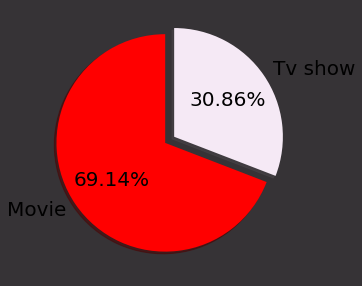

In [21]:
# pie chart showing percentage of total movies and TV shows.
# Choose this facecolor so as to give styke of netflix
fig, ax = plt.subplots(figsize=(5,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(df['type'].value_counts(), explode=explode, autopct='%.2f%%', labels = ['Movie', 'Tv show'], shadow = True,
       startangle=90, textprops={'color':"black", 'fontsize':20}, colors=['red', '#F5E9F5'])




*   Movies uploaded on Netflix are more than twice the TV sj=hows uploaded.

*   This does not implies that movies are more indulging that of TV shows.

*   Beacause TV shows may have several seasons which consists of number of episodes.


*   Duration of TV shows are much more that movies.



Number of Movies and TV Shows added on netflix.

On Year Basis 





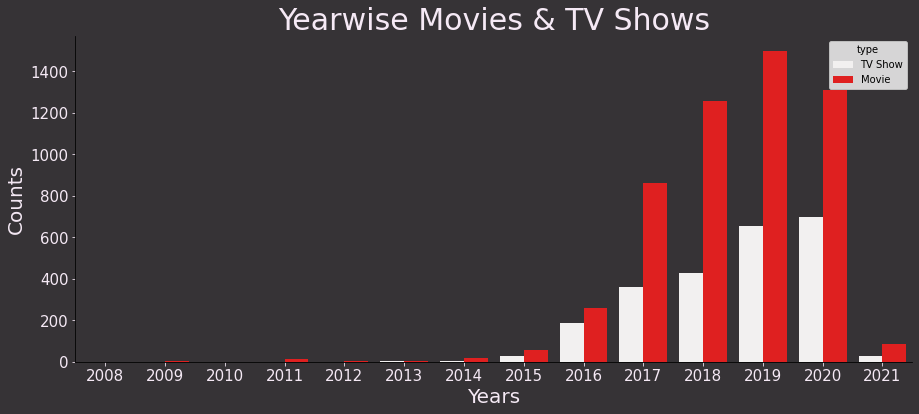

In [22]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='year_added', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Years", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("Yearwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   TV shows are increasing continuosly.
*   Movies were increasing continuosly but after 2019 there is fall.



**On Month Basis**

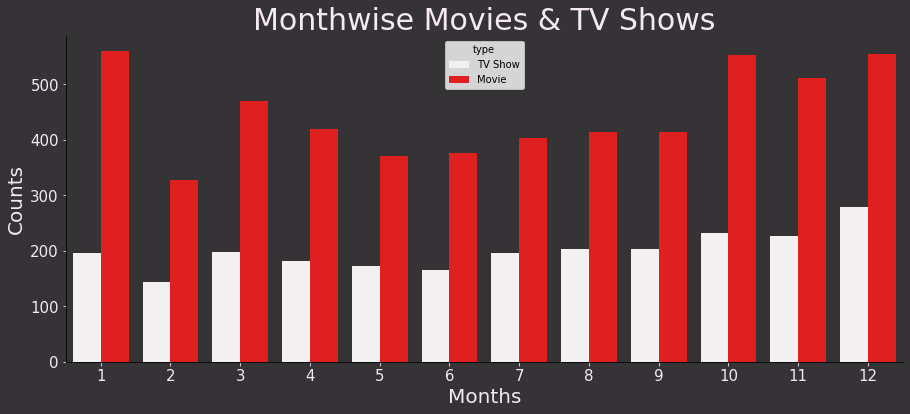

In [23]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='month_added', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Months", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("Monthwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   From Octomber to January, maximum number of movies and TV shows were added.

*   Possible reason for that is, during this period of time events such as Christmas, New Year and several holidays takes place.List item



**On Day Basis**

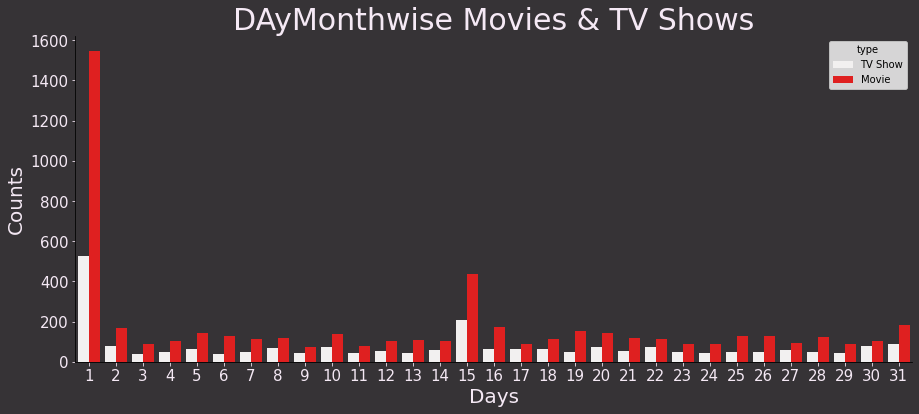

In [24]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='day_added', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Days", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("DAyMonthwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Maximum number of movies and TV shows were either on start of the month or mid of the month.



**Wordwide Presence of Netflix**



*   Popularity Netflix is all over the world.
*   Lets look for its highest presence over countries.



Top 10 Countries having maximum Movies and Tv shows 

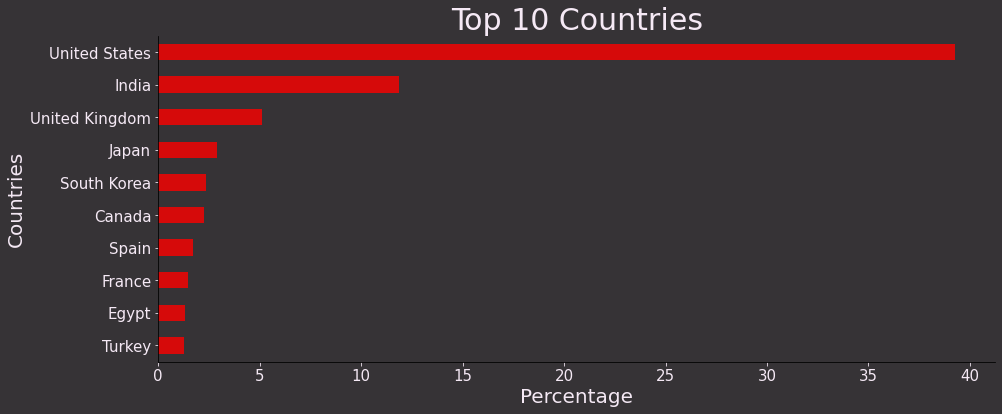

In [25]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
(df['country'].value_counts().sort_values()/df.shape[0]*100)[-10:].plot(kind='barh', ax=ax, color='red', alpha=0.8)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Countries", color='#F5E9F5', fontsize=20)
ax.set_title("Top 10 Countries", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Unities State tops in list of maximum number of movies and TV shows.
*   Followed by India, UK and Japan.



**Ratings on Movies and TV Shows**

**For Movies:**

*   G: Kids
*   PG: Older Kids (7+)


*   PG-13: Teens (13+)
*   NC-17, NR, R, Unrated: Adults (18+)



**For TV Shows:**



*   TV-G, TV-Y: Kids

*   TV-Y7/FV/PG: Older Kids (7+)
*   TV-14: Young Adults (16+)


*   TV-MA: Adults (18+)



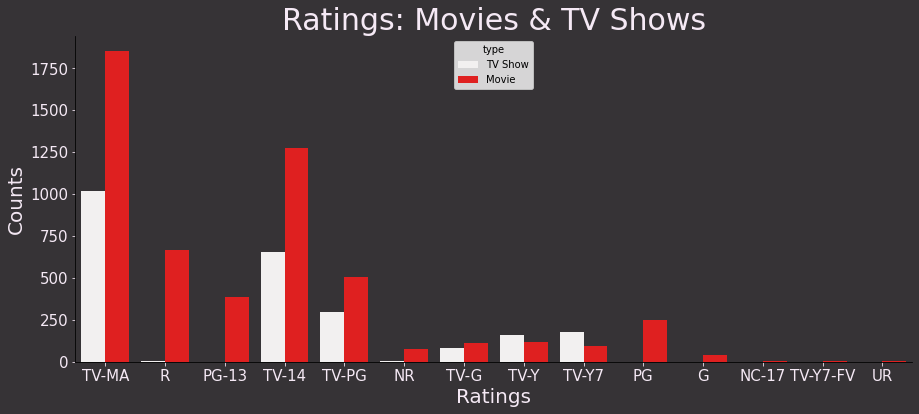

In [26]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='rating', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Ratings", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("Ratings: Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Maximum of movies as well as TV shows are for matures only.



In [27]:
#just take look at values of cast
df['cast'][1]

'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'

In [28]:
#list of cast by making split by comma
df['cast'] = df['cast'].apply(lambda x : x.split(', '))

In [29]:
#making list which contains all the entries from rows
cast_list = []
for i in df['cast']:
  cast_list += i

In [30]:
# unique cast
unique_cast = set(cast_list)

In [31]:
#create dictionary to save cast and their counts
cast_dict = dict((i, cast_list.count(i)) for i in unique_cast)

In [32]:
# create dataframe from above dictionary 
cast_df = pd.DataFrame.from_dict(cast_dict, orient='index',
                                 columns = ['Counts']).sort_values('Counts', ascending = True).reset_index().rename(columns = {'index' : 'cast'})

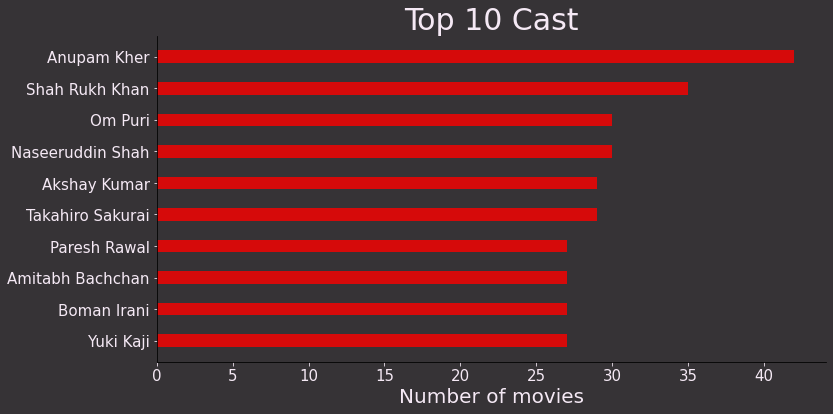

In [33]:
#plot of top 19 cast involved either movies or tv shows
fig, ax = plt.subplots(figsize=(12,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.barh(y=cast_df['cast'][-11:-1], width = cast_df['Counts'][-11:-1], height= 0.4, color ='red', alpha=0.8)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Number of movies", color='#F5E9F5', fontsize=20)
ax.set_title("Top 10 Cast", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Anupam Kher have maximum number of movies or TV shows.


**Seperate Dataframes for Movies and TV shows**

In [34]:
#all the movies and TV shows in different dataframe
movies_df = df[df['type']=='Movie']
tv_df = df[df['type']=='TV Show']

Running Time of Movies

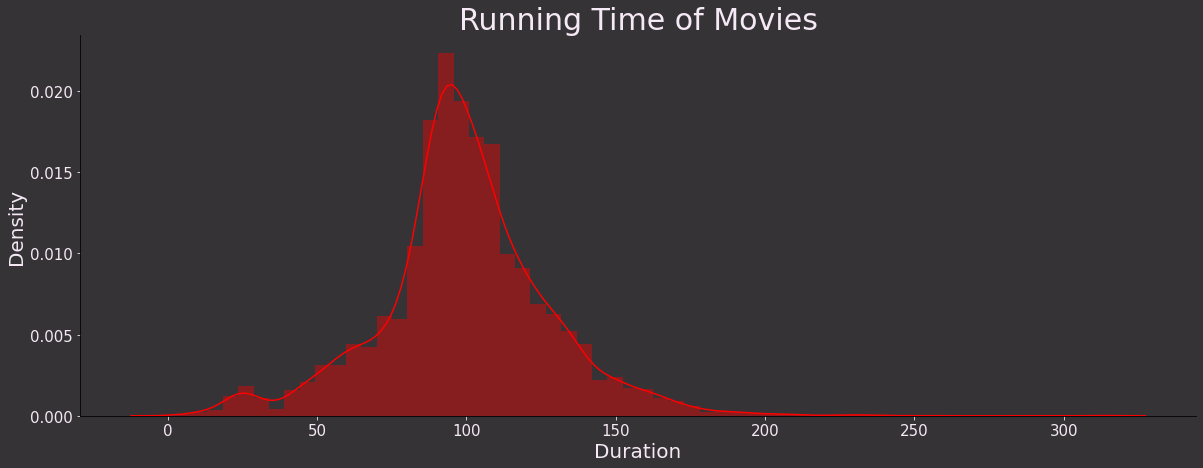

In [35]:
fig, ax = plt.subplots(figsize=(20,7), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.distplot(movies_df['duration'], hist=True, bins=60, color='red', ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Duration", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Density", color='#F5E9F5', fontsize=20)
ax.set_title("Running Time of Movies", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Majority of movies have running time of between 50 to 150 min.



**Seasons of TV shows**

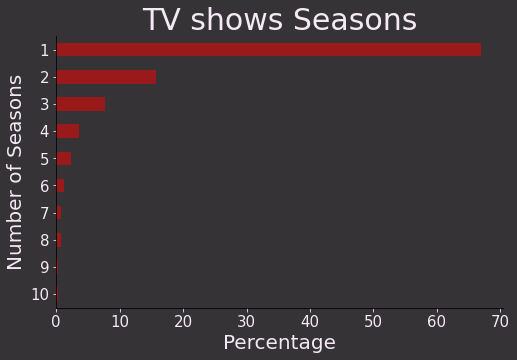

In [36]:
fig, ax = plt.subplots(figsize=(8,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
(tv_df['duration'].value_counts().sort_values()/tv_df.shape[0]*100)[-10:].plot(kind='barh', ax=ax, color='red', alpha=0.5)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Number of Seasons", color='#F5E9F5', fontsize=20)
ax.set_title("TV shows Seasons", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Almost 68% of TV shows consist of single season only.



**Top Genres in Movies & TV Shows**

In [37]:
# list of genres by making split by comma
movies_df['listed_in'] = movies_df['listed_in'].apply(lambda x : x.split(', '))
tv_df['listed_in'] = tv_df['listed_in'].apply(lambda x : x.split(', '))

In [38]:
#Creating list having all the genres in dataset
movie_genre_list = []
for i in movies_df['listed_in']:
  movie_genre_list += i

In [39]:
tv_genre_list = []
for i in movies_df['listed_in']:
  tv_genre_list += i

In [40]:
# to make dictionary out of list of genres
from collections import Counter

In [41]:
# creating datagrame for genres in movies and tv shows
movie_genre_list = Counter(movie_genre_list)
tv_genre_list = Counter(tv_genre_list)

In [42]:
movie_genre_df = pd.DataFrame(movie_genre_list.items())
TV_genre_df = pd.DataFrame(tv_genre_list.items())

In [43]:
movie_genre_df.columns = ['genre', 'movie_count']
TV_genre_df.columns = ['genre', 'tv_count']

In [44]:
movie_genre_df = movie_genre_df.sort_values(by= 'movie_count').reset_index(drop=True)
TV_genre_df = TV_genre_df.sort_values(by= 'tv_count').reset_index(drop=True)

In [45]:
# first look of movie genres dataframe
movie_genre_df

,genre,movie_count
0,Movies,56
1,Anime Features,57
2,Faith & Spirituality,57
3,Cult Movies,59
4,LGBTQ Movies,90
5,Classic Movies,103
6,Sports Movies,196
7,Sci-Fi & Fantasy,218
8,Horror Movies,312
9,Music & Musicals,321


In [46]:
# first look of TV shows genres dataframe
TV_genre_df

,genre,tv_count
0,Movies,56
1,Anime Features,57
2,Faith & Spirituality,57
3,Cult Movies,59
4,LGBTQ Movies,90
5,Classic Movies,103
6,Sports Movies,196
7,Sci-Fi & Fantasy,218
8,Horror Movies,312
9,Music & Musicals,321




*   Some rows seems to be exactly same but due to initial space attached they are different.

*   Need to remove those spaces, so as to get total count of each genres.


*   After removing spaces, aggregation using pandas pivot table in order to get sum of counts of each genres.









In [47]:
# To remove spaces around the word
movie_genre_df['genre'] = movie_genre_df['genre'].str.strip()
TV_genre_df['genre'] = TV_genre_df['genre'].str.strip()

In [48]:
# Aggregating dataframe so as to get final counts of each genres
movie_genre_df = pd.pivot_table(movie_genre_df, index=['genre'], values=['movie_count'], aggfunc='sum').reset_index().sort_values('movie_count')
TV_genre_df = pd.pivot_table(TV_genre_df, index=['genre'], values=['tv_count'], aggfunc='sum').reset_index().sort_values('tv_count')

In [49]:
# Final movie genres datafrmae look like
movie_genre_df
     

,genre,movie_count
13,Movies,56
1,Anime Features,57
8,Faith & Spirituality,57
5,Cult Movies,59
12,LGBTQ Movies,90
3,Classic Movies,103
17,Sports Movies,196
16,Sci-Fi & Fantasy,218
9,Horror Movies,312
14,Music & Musicals,321


In [50]:

# Final TV shows genres datafrmae look like
TV_genre_df
     

,genre,tv_count
13,Movies,56
1,Anime Features,57
8,Faith & Spirituality,57
5,Cult Movies,59
12,LGBTQ Movies,90
3,Classic Movies,103
17,Sports Movies,196
16,Sci-Fi & Fantasy,218
9,Horror Movies,312
14,Music & Musicals,321




*   Now do not have repetative rows in genres.



**Top 5 Genres with Maximum Number of Movies**

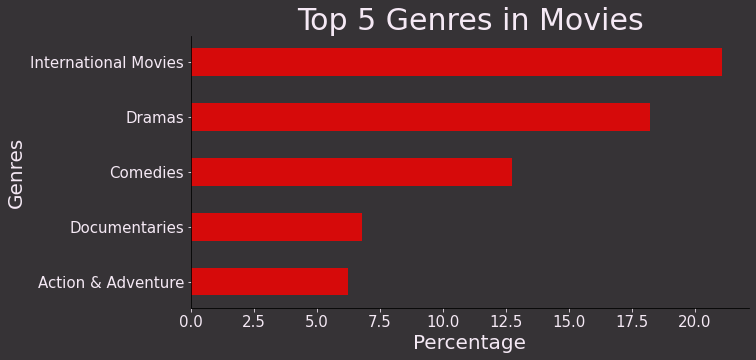

In [51]:
# bar plot showing top 5 genres in movies
fig, ax = plt.subplots(figsize=(10,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.barh(y=movie_genre_df['genre'][-5:], width = movie_genre_df['movie_count'][-5:]/movie_genre_df['movie_count'].sum()*100, height=0.5, color = 'red',alpha=0.8)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Genres", color='#F5E9F5', fontsize=20)
ax.set_title("Top 5 Genres in Movies", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

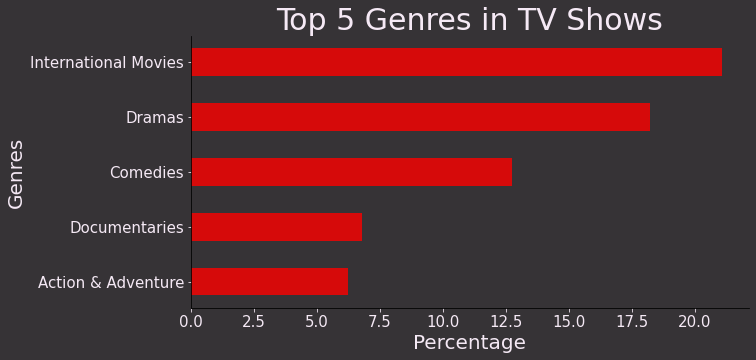

In [52]:
# bar plot showing top 5 genres in movies
fig, ax = plt.subplots(figsize=(10,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.barh(y=TV_genre_df['genre'][-5:], width = TV_genre_df['tv_count'][-5:]/TV_genre_df['tv_count'].sum()*100, height=0.5, color = 'red',alpha=0.8)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Genres", color='#F5E9F5', fontsize=20)
ax.set_title("Top 5 Genres in TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Top 3 genres are exactly same for movies and TV shows.

*   Dramas genres hit all over the world.



**Originally Uploaded on Netflix**


*   Some movies and TV shows were actually released in the past and they were added later on Netflix.
*   But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.





*   **Originals** : For which released year and added year is same.



**Originals in Movies**


*   Creating new feature as originals having values Yes and No.




In [53]:
movies_df['originals'] = np.where(movies_df['release_year']==movies_df['year_added'], 'Yes', 'No')


([<matplotlib.patches.Wedge at 0x7f2414b97ac0>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

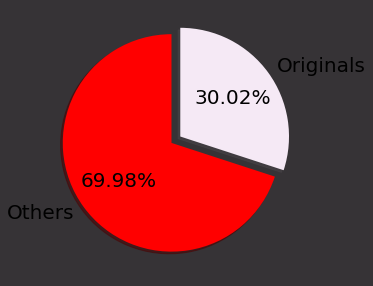

In [54]:
# pie plot showing percentage of originals and other in movies
fig, ax = plt.subplots(figsize=(5,5), facecolor='#363336')
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies_df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color': "black", 'fontsize': 20}, colors =['red', '#F5E9F5'])



*   30% movies released on Netflix.


*   70% movies added on Netflix were released earlier by different mode.



*   May be after buying rights of old released movies and then adding all the movies on Netflix.



# **Data Preprocessing**

In [55]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,"[João Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Connell...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [56]:
# this is how values in cast feature looks like
df['cast'][0]

['João Miguel',
 'Bianca Comparato',
 'Michel Gomes',
 'Rodolfo Valente',
 'Vaneza Oliveira',
 'Rafael Lozano',
 'Viviane Porto',
 'Mel Fronckowiak',
 'Sergio Mamberti',
 'Zezé Motta',
 'Celso Frateschi']

In [57]:
# cast contains list of strings; so joining those strings in a string
df['cast'] = df['cast'].apply(lambda x : ','.join(map(str, x)))

In [58]:
# this is how values in cast feature looks now
df['cast'][0]

'João Miguel,Bianca Comparato,Michel Gomes,Rodolfo Valente,Vaneza Oliveira,Rafael Lozano,Viviane Porto,Mel Fronckowiak,Sergio Mamberti,Zezé Motta,Celso Frateschi'

In [60]:
# cast name contains space between initials, if it pass directly to clustering algoritm, it consider them as two different name
# initial can be same but different last name
# so we need to remove space between initial and last name
df['cast'] = df['cast'].apply(lambda x: x.replace(' ', '').split(','))

In [61]:
 # Above same operation applicable on country name, to remove complexity of two or more words in country name
 df['country'] = df['country'].apply(lambda x : x.replace(' ','').split(',')) 

In [62]:
#above same operation done in listed_in
df['listed_in'] = df['listed_in'].apply(lambda x: x.replace(' ', '').split(','))

In [63]:
# after abose all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x : x.split(' '))

In [64]:
#creating new feature for clustering
df['text'] = df['cast']+df['country']+df['listed_in']+df['description']

In [65]:
#converting text feature to string from list
df['text'] = df['text'].apply(lambda x: " ".join(x))

In [66]:
#making all the words in text feature to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())